In [30]:
import math
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.datasets import load_iris
from sklearn import metrics
from sklearn.cluster import KMeans

# Helper Functions

Computes the Euclidean distance between 2 points 

In [31]:
def distance(point1, point2) -> float:
    return math.sqrt(((point1[0] - point2[0]) ** 2) + ((point1[1] - point2[1]) ** 2))

# Parameters

In [32]:
clusterNum = 3 
error = 0.01   # convergence is no cluster center moving more than this

# Loading Data

No need to have separate sets for training and testing since we are trying to compare the performance of our K-Means clustering algorithm against the Scikit Learn implementation

In [33]:
iris = load_iris()
X = iris.data [:, [1, 3]] # 1 and 3 are the features we will use here.
y = iris.target

# Picking Cluster Centres

Getting the `min` and `max` values fo the features we are trying to cluster

In [34]:
x1_min, x1_max = math.floor(X[:, 0].min()), math.ceil(X[:, 0].max())
x2_min, x2_max =  math.floor(X[:, 1].min()), math.ceil(X[:, 1].max())

# Pick Random Points

Picking random points from the range above as our cluster centres. 

In [35]:
clusters: list[list[int]] = []
for i in range(clusterNum):
    center: list[int] = [random.randrange(x1_min,  x1_max), random.randrange(x2_min,  x2_max)]
    clusters.append(center)


print ("Initial clusters:")
print (clusters)


Initial clusters:
[[3, 2], [4, 2], [4, 1]]


# Training

Running the K-Means algorithm.
First build our own version of the data, `Xcluster`, with an additional element that identifies which cluster the point is in. 
Initiate that cluster to 0.

In [36]:
Xcluster = []
for i in range(len(X)):
    Xcluster.append([X[i], 0])

stop = 0

while stop == 0:
    # Assign each point to the cluster with the nearest centre.
    for i in range(len(Xcluster)):
        distances = []
        # For each data point, compute the distance to each cluster center
        for j in range(len(clusters)):
            distances.append(distance(Xcluster[i][0], clusters[j]))

        # Then assign the point to the cluster with the nearest center.
        if min(distances[0], distances[1], distances[2]) == distances[0]:
            Xcluster[i][1] = 1
        if min(distances[0], distances[1], distances[2]) == distances[1]:
            Xcluster[i][1] = 2
        if min(distances[0], distances[1], distances[2]) == distances[2]:
            Xcluster[i][1] = 3

    # Recompute cluster centres.
    x_coord: list[int]  = [0, 0, 0]
    y_coord: list[int]  = [0, 0, 0]
    counts: list[int]   = [0, 0, 0]

    # Sum up x and y coordinate values of points in each cluster.
    for i in range(len(Xcluster)):
        if Xcluster[i][1] == 1:
            x_coord[0] = x_coord[0] + Xcluster[i][0][0]
            y_coord[0] = y_coord[0] + Xcluster[i][0][1]
            counts[0]  = counts[0] + 1
        if Xcluster[i][1] == 2:
            x_coord[1] = x_coord[1] + Xcluster[i][0][0]
            y_coord[1] = y_coord[1] + Xcluster[i][0][1]
            counts[1]  = counts[1] + 1
        if Xcluster[i][1] == 3:
            x_coord[2] = x_coord[2] + Xcluster[i][0][0]
            y_coord[2] = y_coord[2] + Xcluster[i][0][1]
            counts[2]  = counts[2] + 1

    # Use that to compute new cluster centres and how much each centre
    # moves
    diffs: list[int] = [0, 0, 0]
    for i in range(len(clusters)):
        if counts[i] > 0:
            new_center = [(x_coord[i]/counts[i]), (y_coord[i]/counts[i])]
            diffs[i] = distance(new_center, clusters[i])
            clusters[i] = new_center
   
    # Stop when all centres move less than error
    stop = 1
    for i in range(len(diffs)):
        if diffs[i] > error:
            stop = 0

# Extracting Cluster Identifiers

Extract the cluster identifier into a separate list

In [37]:
labels = []
for i in range(len(Xcluster)):
    labels.append(Xcluster[i][1])

kM_imp: float = metrics.adjusted_rand_score(y, labels)
print ( "Rand index for k-Means implementation: %.4f" % kM_imp )


Rand index for k-Means implementation: 0.7972


# Using Built-In K-Means Algorithm 

In [38]:
kM_X = KMeans(n_clusters = 3)
kM_X.fit(X)
kM_labels = kM_X.labels_
kM_sklearn: float = metrics.adjusted_rand_score(y, kM_labels)
print ("Rand index for k-Means from scikit-learn: %.4f\n" % (kM_sklearn))


Rand index for k-Means from scikit-learn: 0.7972



/home/maruf/.cache/pypoetry/virtualenvs/machine-learning-practicals-tgA2vz9k-py3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


## Comparison

Comparing custom K-Means algorithms against built-in to evaluate the performance. 

In [39]:
if kM_sklearn > kM_imp:
    print ("Scikit-learn k-Means has a better performance\n")
elif kM_sklearn < kM_imp:
    print ("Custom k-Means implementation has a better performance\n")
else:
    print ("Scikit-learn k-Means and custom implementation have same performance\n")

Scikit-learn k-Means and custom implementation have same performance



# Plot

## Custom k-Means Clustering Algorithm

Text(0.5, 1.0, 'k-Means Implementation')

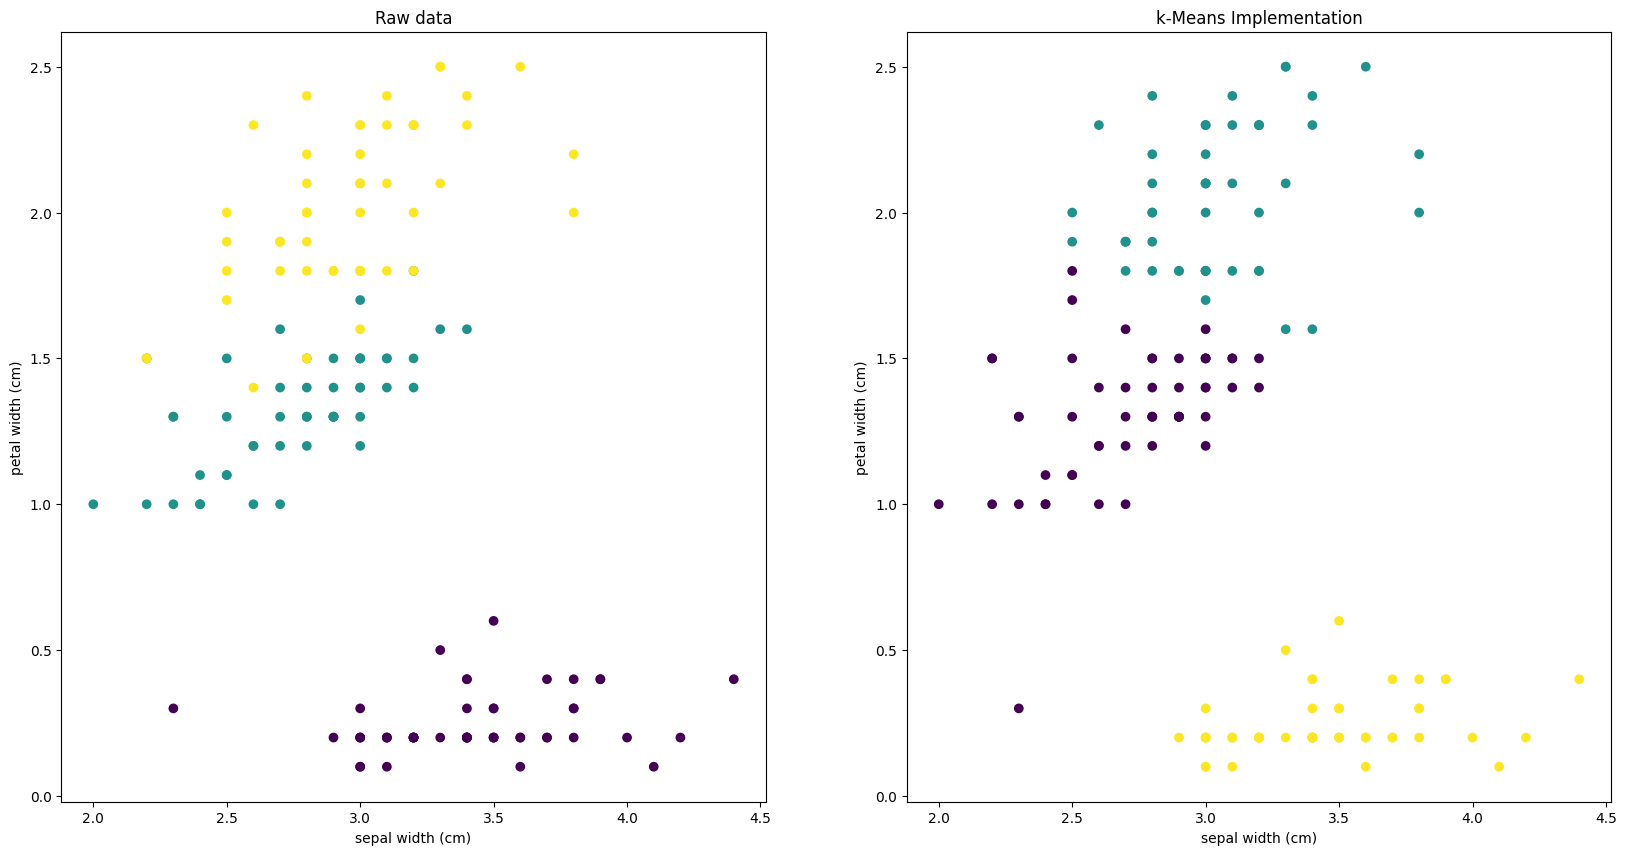

In [44]:
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)

plt.scatter(X[:, 0], X[:, 1], c=y.astype(float))

plt.xlabel(iris.feature_names[1], fontsize=10)
plt.ylabel(iris.feature_names[3], fontsize=10)

plt.title('Raw data')
plt.subplot( 1, 2, 2 )
# Plot the clusters we found.
plt.scatter(X[:, 0], X[:, 1], c=labels)

plt.xlabel(iris.feature_names[1], fontsize=10)
plt.ylabel(iris.feature_names[3], fontsize=10)

plt.title('k-Means Implementation')

## Built-In k-Means Clustering Algorithm

Text(0, 0.5, 'petal width (cm)')

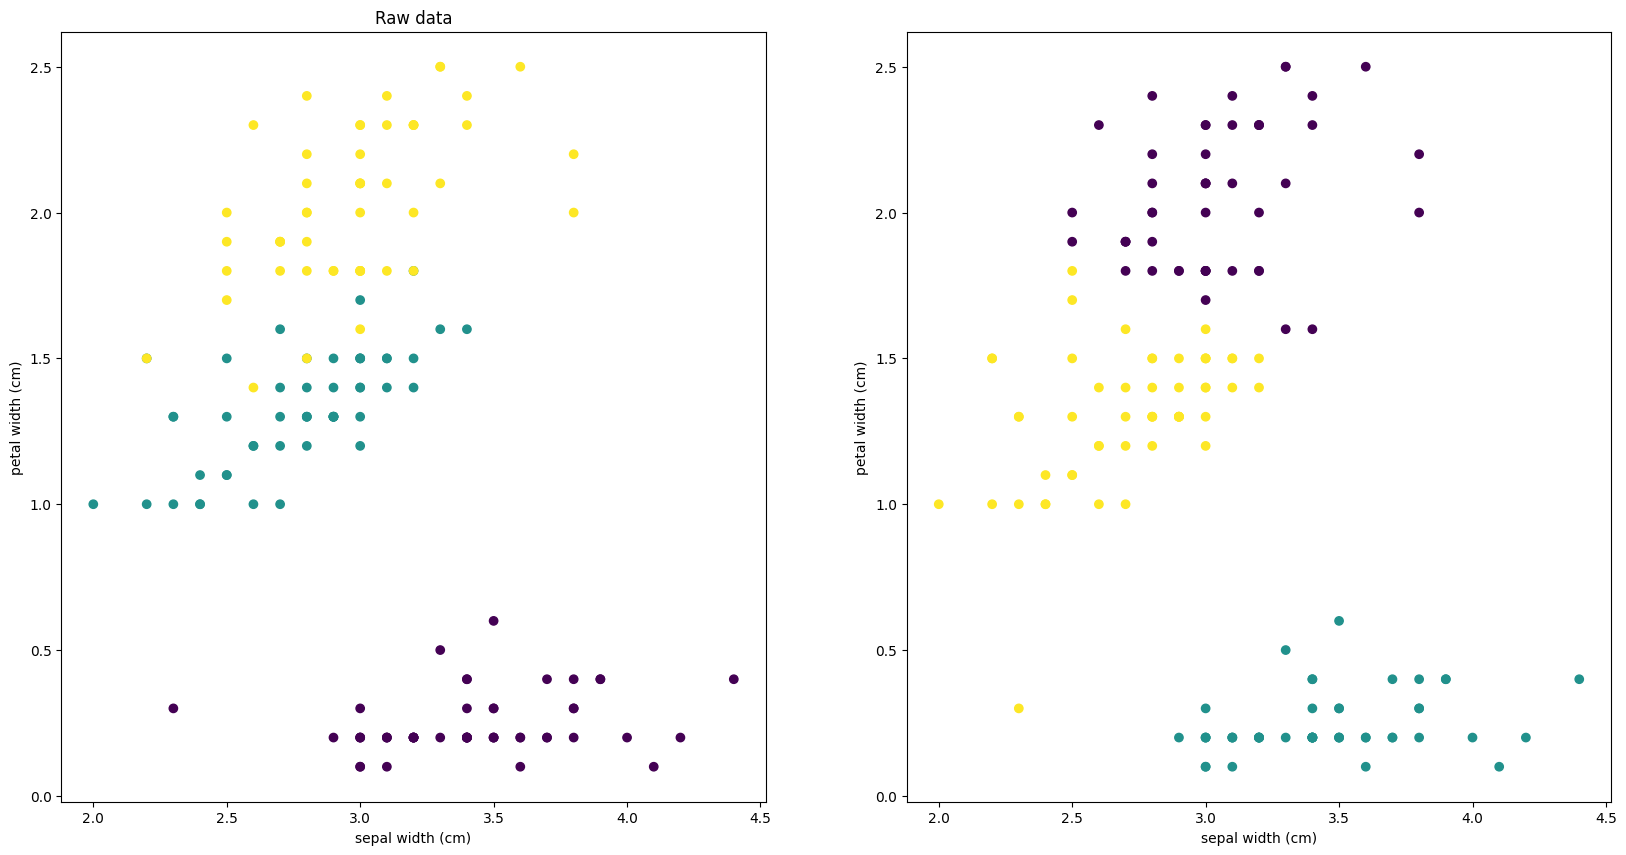

In [45]:
plt.figure(figsize=(20, 10))
plt.subplot( 1, 2, 1 )
# Plot the original data
plt.scatter(X[:, 0], X[:, 1], c=y.astype(float))

plt.xlabel( iris.feature_names[1], fontsize=10 )
plt.ylabel( iris.feature_names[3], fontsize=10 )

plt.title('Raw data')
plt.subplot( 1, 2, 2 )
# Plot the clusters we found.
plt.scatter(X[:, 0], X[:, 1], c=kM_labels)

plt.xlabel( iris.feature_names[1], fontsize=10 )
plt.ylabel( iris.feature_names[3], fontsize=10 )